In [4]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import base64

In [6]:

# 1. 画像の読み込み
image = cv2.imread('../../data/timetable_sample/20240503_JCIF-LIVE_cropped.jpeg')

# 2. グレースケールへの変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. エッジ検出
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# 4. 輪郭検出
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. 各輪郭を囲む矩形を取得し、抽出
rectangles = []
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    rectangles.append((x, y, w, h))
    
# 6. 矩形領域の抽出
cropped_image = image[y:y+h, x:x+w]

# 7. 抽出した領域の保存
# cv2.imwrite(f'cropped_image_{i}.jpg', cropped_image)

# Optional: 検出した矩形を元の画像に描画して確認
for (x, y, w, h) in rectangles:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 画像の表示
cv2.imshow('Detected Rectangles', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


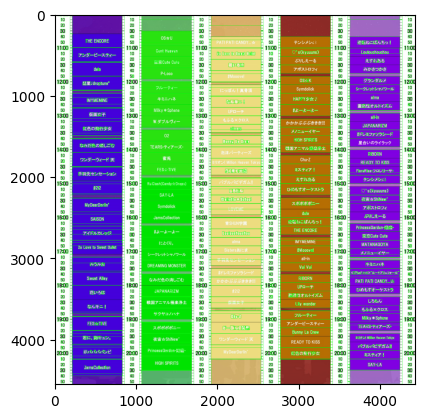

In [7]:
plt.imshow(image)

In [10]:
image.shape

(4551, 4437, 3)

In [45]:
w_data = []
h_data = []
for (x, y, w, h) in rectangles:
    print(x,y,w,h)
    w_data.append(w)
    h_data.append(h)

211 4524 1 27
3623 4523 1 28
3597 4519 28 4
2745 4518 26 33
2655 4502 22 38
948 4502 22 38
4363 4501 22 39
4338 4501 21 39
3507 4501 22 39
3483 4501 20 39
2630 4501 21 39
1801 4501 22 39
1776 4501 21 39
923 4501 21 39
94 4501 23 39
71 4501 19 39
4238 4485 2 3
1677 4484 2 4
826 4449 27 102
212 4447 1 2
4363 4433 22 37
1801 4433 22 37
948 4433 22 37
94 4433 23 37
3507 4432 22 39
2655 4432 22 38
4337 4431 22 39
3483 4431 20 39
2629 4431 22 39
1776 4431 21 39
923 4431 21 39
71 4431 20 39
214 4423 612 27
211 4421 2 25
1038 4415 28 136
211 4412 1 7
1062 4386 2 28
2745 4385 26 132
2530 4384 29 167
1067 4382 612 2
3385 4379 1 2
3622 4378 614 2
1892 4378 28 173
829 4378 24 72
4363 4358 27 48
4333 4358 27 48
3507 4358 29 48
3478 4358 27 48
2653 4358 29 48
2624 4358 27 48
1801 4358 28 48
1771 4358 26 48
948 4358 27 48
919 4358 26 48
94 4358 29 48
65 4358 27 48
565 4356 1 1
3597 4350 27 168
393 4347 1 1
2531 4345 27 38
1892 4344 27 33
657 4337 22 31
631 4337 22 32
620 4337 7 31
577 4337 22 32
554 

In [58]:
df_rectangle = pd.DataFrame(rectangles,columns=["横位置","縦位置","横幅","縦幅"])

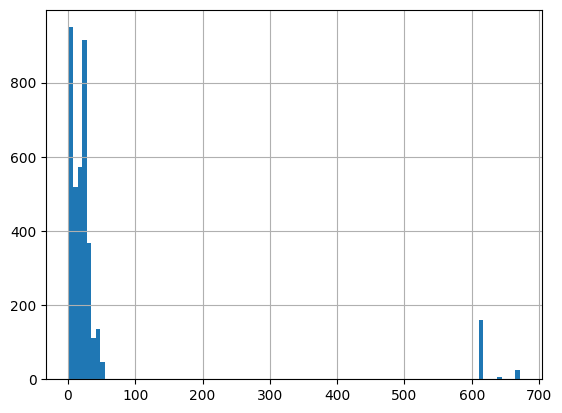

横幅
614    57
615    33
613    23
616    19
617    15
666    11
612     9
668     7
611     3
667     3
671     3
640     2
610     2
670     2
641     1
618     1
638     1
157     1
601     1
642     1
Name: count, dtype: int64


In [73]:
pd.Series(df_rectangle["横幅"]).hist(bins=100)#615付近にピークあり
plt.show()
print(df_rectangle[df_rectangle["横幅"]>100]["横幅"].value_counts())

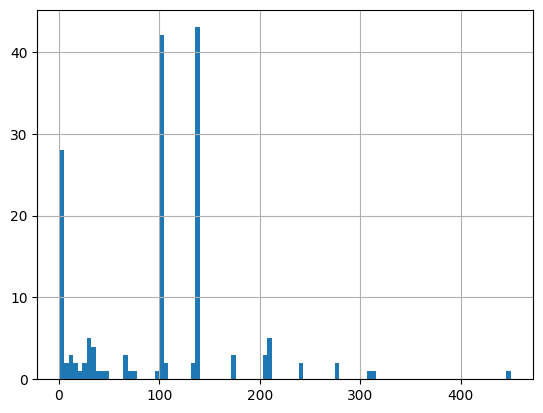

縦幅
136    25
102    24
2      14
103    11
138     9
1       7
137     6
101     5
35      3
139     3
172     3
3       3
30      3
209     3
104     2
208     2
4       2
135     2
27      2
206     2
10      2
5       2
15      1
310     1
66      1
9       1
36      1
50      1
45      1
12      1
205     1
105     1
6       1
311     1
275     1
17      1
106     1
68      1
31      1
241     1
243     1
19      1
98      1
276     1
40      1
73      1
28      1
67      1
71      1
450     1
Name: count, dtype: int64


In [74]:
df_rectangle[df_rectangle["横幅"].between(600,630)]["縦幅"].hist(bins=100)#34の倍数付近にピークあり#ただし5,6倍(25,30分尺に相当)はほぼ無し
plt.show()
print(df_rectangle[df_rectangle["横幅"].between(600,620)]["縦幅"].value_counts())

In [ ]:
#各出演の四角形の抽出（縦幅）がうまくいっていない。。

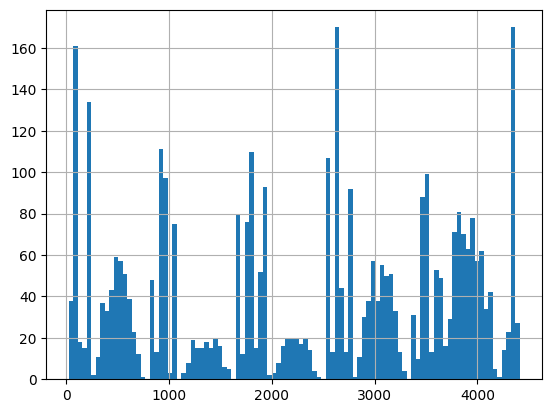

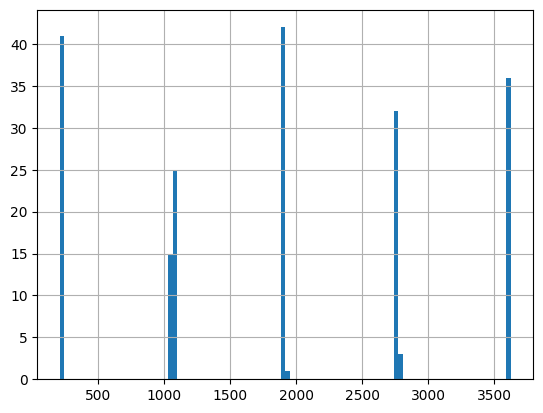

横位置
1065    24
1918    23
3623    20
211     19
2771    15
1892    13
2772    11
212     10
1038     9
213      6
1917     6
214      5
3622     5
1064     3
2774     3
2769     3
3626     3
3597     3
2770     3
3598     2
3624     2
1039     2
1067     1
215      1
3625     1
1921     1
1063     1
Name: count, dtype: int64

In [80]:
pd.Series(df_rectangle["横位置"]).hist(bins=100)
plt.show()
pd.Series(df_rectangle[df_rectangle["横幅"]>100]["横位置"]).hist(bins=100)#211~12,1065,1918,2771~2,3623
plt.show()
df_rectangle[df_rectangle["横幅"]>100]["横位置"].value_counts()

In [81]:
#矩形抽出したあと、CodeInterpreterを使ってタイムテーブル分析を行う
from dotenv import load_dotenv
load_dotenv()
from openai import OpenAI
client = OpenAI()

In [83]:
import base64
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
base64_image = encode_image("../../data/timetable_sample/20240503_JCIF-LIVE_cropped.jpeg")


In [152]:
# df_rectangle = df_rectangle[(df_rectangle["横幅"]>=10)&(df_rectangle["縦幅"]>=10)].reset_index(drop=True)

file_image = client.files.create(
    file=open("../../data/timetable_sample/20240503_JCIF-LIVE_cropped.jpeg", "rb"),
    # file=base64_image,
    purpose='assistants'
)
file_data = client.files.create(
    file=df_rectangle.to_csv(index=False).encode(encoding="shift-jis"),
    purpose="assistants"
)

In [153]:
assistant = client.beta.assistants.create(
    name="時間軸式のタイムテーブル読み取り",
    instructions="""あなたは画像を構造化データに変換することが仕事です。

# 与えられるデータ
アイドルのフェスのタイムテーブル画像、およびそこから読み取った矩形一覧のcsvデータが与えられます。
タイムテーブル画像には、複数のステージのタイムテーブルが横並びで描かれています。
ステージ数はユーザーから与えられます。
縦方向には、上から下へ時間軸に沿って出演するアイドルが記載されています。
各アイドルの出演時間は矩形で囲まれており、その上端と下端がそれぞれ開始時刻と終了時刻を指しています。
矩形のcsvデータはあくまでエッジ抽出による結果であり、実際の内容に誤差を含みます。

# あなたが行うこと
あなたは下記のステップに従って、構造化されたデータを出力してください。

## 手順1：「ステージの横幅」を求める
### 1-1：「横幅の基準値」を求める
画像サイズの横幅をステージ数で割った値に0.3を掛けた値を「横幅の基準値」とします。
### 1-2：「横幅」の値の出現頻度を求める
矩形一覧のcsvデータから、「横幅」の値の出現頻度を求めます。
ただしこの時、「横幅の基準値」以上の値を対象とします。
### 1-3：「ステージの横幅」を求める
頻出する「横幅」の値を「ステージの横幅」とします。
画像がら読み取った矩形データにはある程度の誤差があるかもしれないので、
単に最頻値を抽出するのではなく、一定のレンジ内で頻出していることを優先してください。

上記1-1～1-3を実行し、
・横幅の基準値
・ステージの横幅
を出力してください。

## 手順2：「各ステージの横位置」を求める
### 2-1：「横位置」の値の出現頻度を求める
矩形一覧のcsvデータから、「横位置」の値の出現頻度を求めます。
ただしこの時、「横幅」が「横幅の基準値」以上のレコードを対象とします。
### 2-2：「各ステージの横位置」を求める
頻出する「横位置」の値を「各ステージの横位置」とします。
ステージ数の数だけ、「ステージの横位置」を求めてください。
画像がら読み取った矩形データにはある程度の誤差があるかもしれないので、
単に最頻値を抽出するのではなく、一定のレンジ内で頻出していることを優先してください。
なお各ステージの横位置は一定の間隔で出現することが予想されますが、
その間隔は手順1で求めた「ステージの横幅」に近い値と考えられます。

上記2-1～2-2を実行し、
・各ステージの横位置（リスト）
を出力してください。

""",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4o",
    tool_resources={
        "code_interpreter": {
            "file_ids": [file_image.id,file_data.id]
        }
    }
)

In [154]:
thread = client.beta.threads.create()
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="ステージ数は5個です。",
)

In [155]:
response = client.beta.threads.runs.create_and_poll(
  assistant_id=assistant.id,
  thread_id=thread.id
)

In [156]:
thread_messages = client.beta.threads.messages.list(thread_id=thread.id)
for message in thread_messages.data[::-1]:
    print(message.role)
    print(message.content[0].text.value)

user
ステージ数は5個です。
assistant
まず、アップロードされたファイルの内容を確認します。画像ファイルと矩形一覧のCSVファイルが含まれていると思われますので、それぞれを読み込みます。

1. タイムテーブル画像
2. 矩形一覧のCSVデータ

それでは、まずはファイルの内容を確認します。
assistant
読み込んだ画像のサイズは、横幅4437ピクセル、高さ4551ピクセルです。

次に、矩形一覧のCSVデータを確認しましょう。
assistant
CSVファイルの読み込みでエンコーディングエラーが発生しました。ファイルのエンコーディングが異なる可能性があるため、他のエンコーディングを試してみます。まずは、ファイルの内容を確認してから適切なエンコーディングを見つけます。
assistant
読み取ったバイナリデータから、ファイルがUTF-8以外のエンコーディングで書かれていることがわかります。エンコーディングをShift_JISと仮定して試してみます。
assistant
CSVファイルの内容を正常に読み込むことができました。データフレームには「横位置」、「縦位置」、「横幅」、「縦幅」のカラムが含まれています。

では、手順に従って「ステージの横幅」を求める作業に進みます。

### 手順1：「ステージの横幅」を求める
#### 1-1：「横幅の基準値」を求める
- 画像サイズの横幅：4437ピクセル
- ステージ数：5

まず、「横幅の基準値」を計算します。
assistant
「横幅の基準値」は約266.22ピクセルです。

次に、この基準値以上の「横幅」の値の出現頻度を求めます。
assistant
出現頻度が高い「横幅」の値は以下の通りです:
- 614ピクセル: 57回
- 615ピクセル: 33回
- 613ピクセル: 23回
- 616ピクセル: 19回
- 617ピクセル: 15回

このように、約613〜617ピクセルの範囲に多くの値が集中しています。この範囲を考慮すると、「ステージの横幅」はこれらの値の中から代表的なものを選択するのが適切です。

「ステージの横幅」として、最も頻出している614ピクセルを選定します。

### 手順1の結果
- 横幅の基準値: 266.22ピクセル
- ステージの横幅: 614ピクセル

次に

In [126]:
run = client.beta.threads.create_and_run(
  assistant_id=assistant.id,
  thread={
    "messages": [
      {"role": "user", "content": "ステージ数は5個です。"}
    ]
  }
)

In [134]:
run = client.beta.threads.runs.retrieve(
    thread_id=run.thread_id,
    run_id=run.id
)

In [137]:
if run.status == 'completed':
    thread_messages = client.beta.threads.messages.list(thread_id=run.thread_id)
    print(thread_messages.data)

[Message(id='msg_dc4mqDFK40mbIH84LhNoMmyL', assistant_id='asst_OkHxWhydcTY0LmYd8ZI0ajnA', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='まず、アップロードされたファイルを確認し、次に手順1に従って「ステージの横幅」を求めます。\n\nアップロードされたファイルの内容を読み込みます。'), type='text')], created_at=1718526924, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_9MR0xKT0Ai47kNrakh4LAra3', status=None, thread_id='thread_uOLkwemKM7jAGDTWFtVzIzTD'), Message(id='msg_gJDeR4ZTZmr7wRrM2weiyeIE', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='ステージ数は5個です。'), type='text')], created_at=1718526924, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_uOLkwemKM7jAGDTWFtVzIzTD')]


In [145]:
if run.status == 'completed':
    thread_messages = client.beta.threads.messages.list(thread_id=run.thread_id)
    for message in thread_messages.data[::-1]:
        print(message.role)
        print(message.content[0].text.value)

user
ステージ数は5個です。
assistant
まず、アップロードされたファイルを確認し、次に手順1に従って「ステージの横幅」を求めます。

アップロードされたファイルの内容を読み込みます。


In [141]:
new_text = "ファイルは読み込めましたか？"
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="方程式 `3x + 11 = 14` を解いてほしいです。手伝ってもらえますか？",
)

run = client.beta.threads.runs.create_and_poll(
  assistant_id=assistant.id,
  thread_id=run.thread_id
)


In [142]:
if run.status == 'completed':
    thread_messages = client.beta.threads.messages.list(thread_id=run.thread_id)
print(thread_messages.data)

[Message(id='msg_dc4mqDFK40mbIH84LhNoMmyL', assistant_id='asst_OkHxWhydcTY0LmYd8ZI0ajnA', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='まず、アップロードされたファイルを確認し、次に手順1に従って「ステージの横幅」を求めます。\n\nアップロードされたファイルの内容を読み込みます。'), type='text')], created_at=1718526924, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_9MR0xKT0Ai47kNrakh4LAra3', status=None, thread_id='thread_uOLkwemKM7jAGDTWFtVzIzTD'), Message(id='msg_gJDeR4ZTZmr7wRrM2weiyeIE', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='ステージ数は5個です。'), type='text')], created_at=1718526924, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_uOLkwemKM7jAGDTWFtVzIzTD')]


In [106]:

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": user_prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}",
                        },
                    },
                ],
            }
        ],
        response_format={"type": "json_object"},
        max_tokens=4096
    )

    return response

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 28)

In [ ]:
# 5. 各輪郭を囲む矩形を取得し、抽出
# rectangles = []
for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    # rectangles.append((x, y, w, h))
    
    # 6. タイテ部分っぽければ矩形領域の抽出
    if
    cropped_image = image[y:y+h, x:x+w]
    plt.imshow(image)
    
    # 7. 抽出した領域の保存
    # cv2.imwrite(f'cropped_image_{i}.jpg', cropped_image)


In [9]:
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
import cv2
from PIL import Image
import pandas as pd

# Load the image
image_path = "../../data/projects/関ケ原2023/event_1/ライブ/stage_1.png"
image = Image.open(image_path)

# Convert the image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)

# Use pytesseract to extract text from the image
text_data = pytesseract.image_to_data(image_rgb, lang='jpn', output_type=Output.DICT)

# Extract text and their bounding box coordinates
n_boxes = len(text_data['level'])
artist_schedule = []

for i in range(n_boxes):
    if int(text_data['conf'][i]) > 60:  # confidence threshold to filter out weak text detection
        text = text_data['text'][i]
        left = text_data['left'][i]
        top = text_data['top'][i]
        width = text_data['width'][i]
        height = text_data['height'][i]
        
        # Determine if the text is time or artist based on position
        if left < 100:  # Assume times are on the left side
            # if text.isdigit() and int(text) <= 2400:  # filter to include only time values
            #     time = f"{text[:2]}:{text[2:]}"
            #     artist_schedule.append({"time": time})
            if text.isdigit():
                artist_schedule.append({"time": text})
        else:
            if artist_schedule and "artist" not in artist_schedule[-1]:
                artist_schedule[-1]["artist"] = text
            else:
                artist_schedule.append({"artist": text})

# Create DataFrame
df = pd.DataFrame(artist_schedule)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Artist Schedule", dataframe=df)

df


,time,artist
0,③0,NaN
1,④0,NaN
2,③0,NaN
3,④0,NaN
4,⑤0,NaN
...,...,...
256,NaN,に
257,NaN,①
258,NaN,①
259,NaN,①


In [5]:
import os
from PIL import Image
import pyocr
import pyocr.builders

# 1.OCRエンジンの取得
pyocr.tesseract.TESSERACT_CMD = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
tools = pyocr.get_available_tools()
tool = tools[0]

# 2.原稿画像の読み込み
#ソースと同じフォルダに配置している画像ファイル
image_path = "../../data/projects/関ケ原2023/event_1/ライブ/stage_1.png"
img_org = Image.open(image_path)

# 3.OCR実行
#tesseract_layout=3はディフォルト設定値となります。
#5を設定した場合は、縦読みを実施できます。
builder = pyocr.builders.TextBuilder(tesseract_layout=3)
result = tool.image_to_string(img_org, lang="jpn", builder=builder)

#結果出力
print(result)

⑪:00

⑮:00

⑳

③0
④0

⑤0
⑯:00

⑳

③0
④0

⑤0
⑰:00

⑳

③0
④0

①⑧:00

ワ ン ダ ー ウ ィ ー ド 天

HIGH SPIRITS

dela

ア ン タ ー ビ ー ス テ ィ ー

THE ENCORE

ハ ニ ー ス パ イ ス Re.

夜 宙 文 ShiNeWw`

風 男 塾

ン ニ ク レ ッ ト シ ャ ン ワ ー ル

SAISON

elsy

蜜 兎

メ イ ビ ーME

C:ON( シ ー オ ン )

に ー に ー

PrincessGarden- 姫 庭 -

花 い ろ は

が パ ラ デ ィ ー ク

⑰00

①

①

①

GILTYxGILTY

ー

君 に 、 胸 キ ュ ン 。
ョ

①

① ②o Love to Sweet Bullet

彗 星 J dropTune“

純 情 の ア フ ィ リ ア

か す み 草 と ス テ ラ

MyDearDarlin“

⑲:00

FES 衣 TIVE

手 羽 先 セ ン セ ー シ ョ ン

⑮:00

①0
⑳

③0
④0

⑤0

F①⑧00

⑳
③0
④0
⑤0

|

に エ エ コ

ロ ロ エ エ

ロ ロ I I |

ロ ロ

|


In [93]:
#横線取得
import cv2
import numpy as np
import pandas as pd
from operator import itemgetter

image_path = "../../data/projects/関ケ原2023/event_1/特典会/stage_1.png"
# bgr_img = cv2.imread(image_path)
image = Image.open(image_path)
bgr_img = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# img = bgr_img[:,:,0]
height, width = gray_img.shape
minlength = width * 0.7
gap = 0

#エッジ検出
im_edges = cv2.Canny(gray_img, 130, 285, L2gradient=True)

#ハフ変換による直線抽出
lines = []
lines = cv2.HoughLinesP(im_edges, rho=1, theta=np.pi/360, threshold=100, minLineLength=minlength, maxLineGap=gap)

line_list = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    whiteline = 3
    if x1 != x2 and abs((y1 - y2)/(x1 - x2)) < np.tan(np.pi/180*5):#傾きが5度未満のもののみ検出
        # line_list.append(line[0])
        line_list.append([x1, y2, x2, y1])

# y座標をキーとして並び変え
line_list.sort(key=itemgetter(1, 0, 2, 3))

hoz_line_list = []
y1 = 0
for line in line_list:
    judge_y1 = line[1]
    # ほぼ同じ位置の横線は除外
    if abs(judge_y1 - y1) < 3 and hoz_line_list != []:
        y1 = judge_y1
    else:
        y1 = judge_y1
        hoz_line_list.append(line)

line_list = pd.DataFrame(hoz_line_list)
print('line_list_pd')
display(line_list)
# cv2.imwrite('out.jpg', lineadd_img)

line_list_pd


,0,1,2,3
0,24,28,132,28
1,23,58,132,58
2,17,768,130,768
3,15,994,130,994
4,15,1084,130,1084
5,14,1310,131,1310
6,13,1446,129,1446
7,13,1671,130,1671
8,18,1716,131,1716
9,22,1942,130,1942


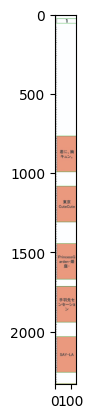

In [112]:
for i,line in line_list.iterrows():
    cv2.line(bgr_img, (0, line[1]), (bgr_img.shape[1], line[1]), color=(0,255,0))
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

In [99]:
2140.5274999999997*0.3429061294470639

734.0

In [114]:
(768-y_1)/y_2*dur

227.1124745569487

In [118]:
y_1 = 568.66875
y_2 = 1659.34625

dur = 550.0

import datetime
start_time = datetime.datetime(2024,1,1,11,50)


for i,line in line_list.iterrows():
    print(line[1])
    print(np.round((line[1]-y_1)/(y_2/dur*5))*5)
    print((start_time+datetime.timedelta(minutes=(line[1]-y_1)/y_2*dur)).time())



28
-180.0
08:50:47.531219
58
-170.0
09:00:44.151725
768
65.0
12:56:04.170377
994
140.0
14:10:58.711526
1084
170.0
14:40:48.573045
1310
245.0
15:55:43.114193
1446
290.0
16:40:47.793822
1671
365.0
17:55:22.447621
1716
380.0
18:10:17.378380
1942
455.0
19:25:11.919529
2033
485.0
19:55:21.668398
2258
560.0
21:09:56.322196
2330
585.0
21:33:48.211412


In [122]:
import sys
root_directory = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(root_directory,"src"))
from backend_functions import gpt_ocr
image_path = "../../data/projects/関ケ原2023/event_1/特典会/stage_1.png"
response = gpt_ocr.getocr_fes_timetable_notime(image_path)

In [123]:
response

{'タイムテーブル': [{'グループ名': '君に、胸キュン。'},
  {'グループ名': '東京CuteCute'},
  {'グループ名': 'PrincessGarden-姫庭-'},
  {'グループ名': '手羽先センセーション'},
  {'グループ名': 'SAY-LA'}]}

In [127]:
lines

In [131]:
image_path = "../../data/projects/関ケ原2024/event_1/特典会/raw_cropped.png"
# bgr_img = cv2.imread(image_path)
image = Image.open(image_path)
bgr_img = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
# img = bgr_img[:,:,0]
height, width = gray_img.shape
minlength = height * 0.01
gap = 0

#エッジ検出
im_edges = cv2.Canny(gray_img, 130, 285, L2gradient=True)

#ハフ変換による直線抽出
lines = []
lines = cv2.HoughLinesP(im_edges, rho=1, theta=np.pi/360, threshold=100, minLineLength=minlength, maxLineGap=gap)

line_list = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    whiteline = 3
    if x1 == x2 or abs((y1 - y2)/(x1 - x2)) > np.tan(np.pi/180*85):#傾きが85度より大きいのもののみ検出
        # line_list.append(line[0])
        line_list.append([x1, y2, x2, y1])

# x座標をキーとして並び変え
line_list.sort(key=itemgetter(0, 1, 2, 3))

# hoz_line_list = []
# x1 = 0
# for line in line_list:
#     judge_x1 = line[0]
#     # ほぼ同じ位置の横線は除外
#     if abs(judge_x1 - x1) < 3 and hoz_line_list != []:
#         x1 = judge_x1
#     else:
#         x1 = judge_x1
#         hoz_line_list.append(line)

line_list = pd.DataFrame(line_list)
print('line_list_pd')
display(line_list)
# cv2.imwrite('out.jpg', lineadd_img)

line_list_pd


,0,1,2,3
0,64,515,64,467
1,64,632,64,584
2,64,733,64,702
3,64,885,64,854
4,64,919,64,887
...,...,...,...,...
575,3953,1340,3953,1309
576,3953,1391,3953,1342
577,3953,1424,3953,1393
578,3953,1610,3953,1544


In [136]:
line_list.loc[:,0].value_counts().head(50).sort_index()

0
64      13
66      12
196      8
323      7
325     14
453      8
455     11
711     14
766     10
895      8
1025     8
1154     9
1281     9
1283     9
1411    13
1413    12
1464    13
1466     8
1593     7
1595     9
1722    11
1724     8
1852     7
1854     8
1981    13
1983    10
2293    14
2422     9
2424    10
2551    10
2553     9
2681     9
2810    15
2863    14
2865    12
2993    11
3122    11
3124     8
3251     9
3253     9
3381    11
3383    10
3510     9
3512    11
3565    11
3694    10
3821     9
3823     8
3951     8
3953    16
Name: count, dtype: int64

In [5]:
image_path = "../../data/projects/竜王2024/event_1/特典会/stage_1.png"
image = Image.open(image_path)

# 元の画像のサイズを取得
original_width, original_height = image.size

# 右側に拡張する幅を指定
extension_width = 200

# 新しい画像サイズを計算
new_width = original_width + extension_width
new_height = original_height

# 拡張した空白領域を持つ新しい画像を作成
new_image = Image.new("RGB", (new_width, new_height), (255, 255, 255))  # 白色の背景
new_image.paste(image, (0, 0))

new_image.show()